Assignment-Week 7
BITS F464    
Shivam Chadha  
2019B4AA0704G  
Honour Code: I shall be honest in my efforts and will make my parents proud


In [1]:
# importing necessary packages
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Referred This implemementation
https://github.com/Sharut/SVM-hard_margin-using-CVXPY  
and   
https://ai538393399.wordpress.com/2020/11/25/svm-using-cvxpy/  

# 1 Lagrangian

a)  
b)    
c)    
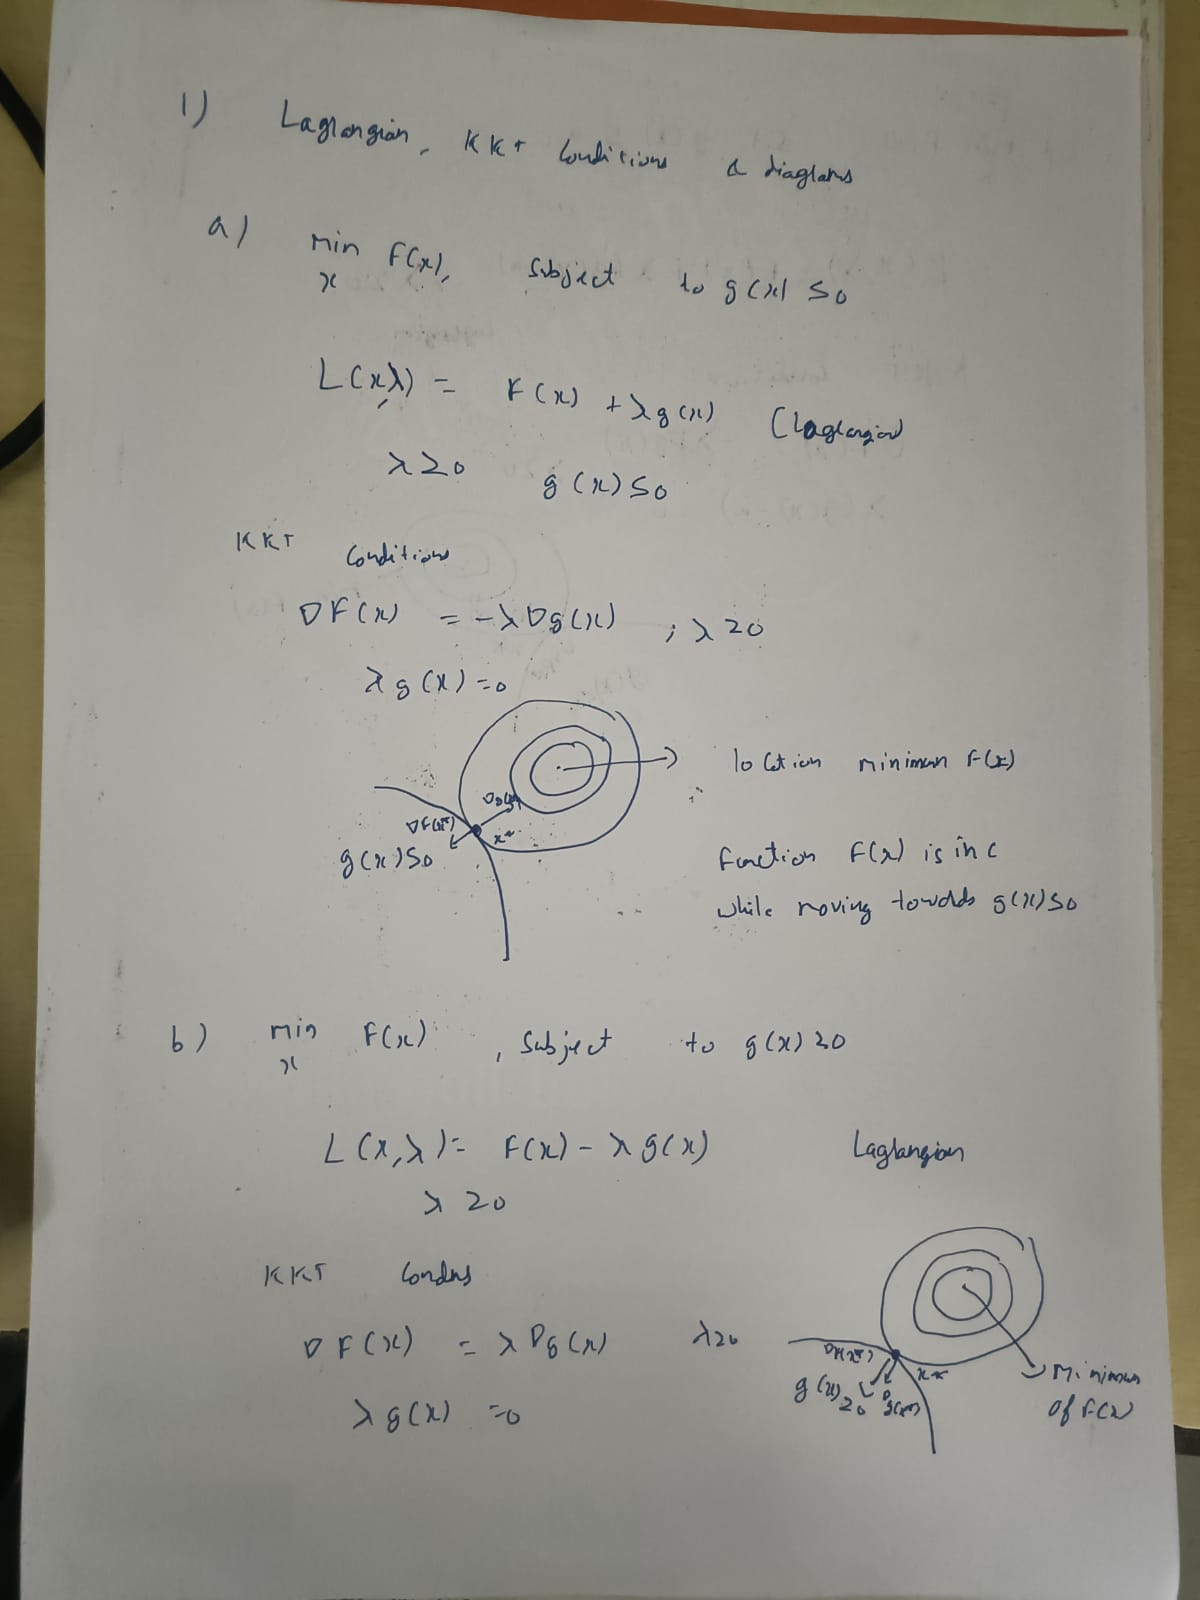

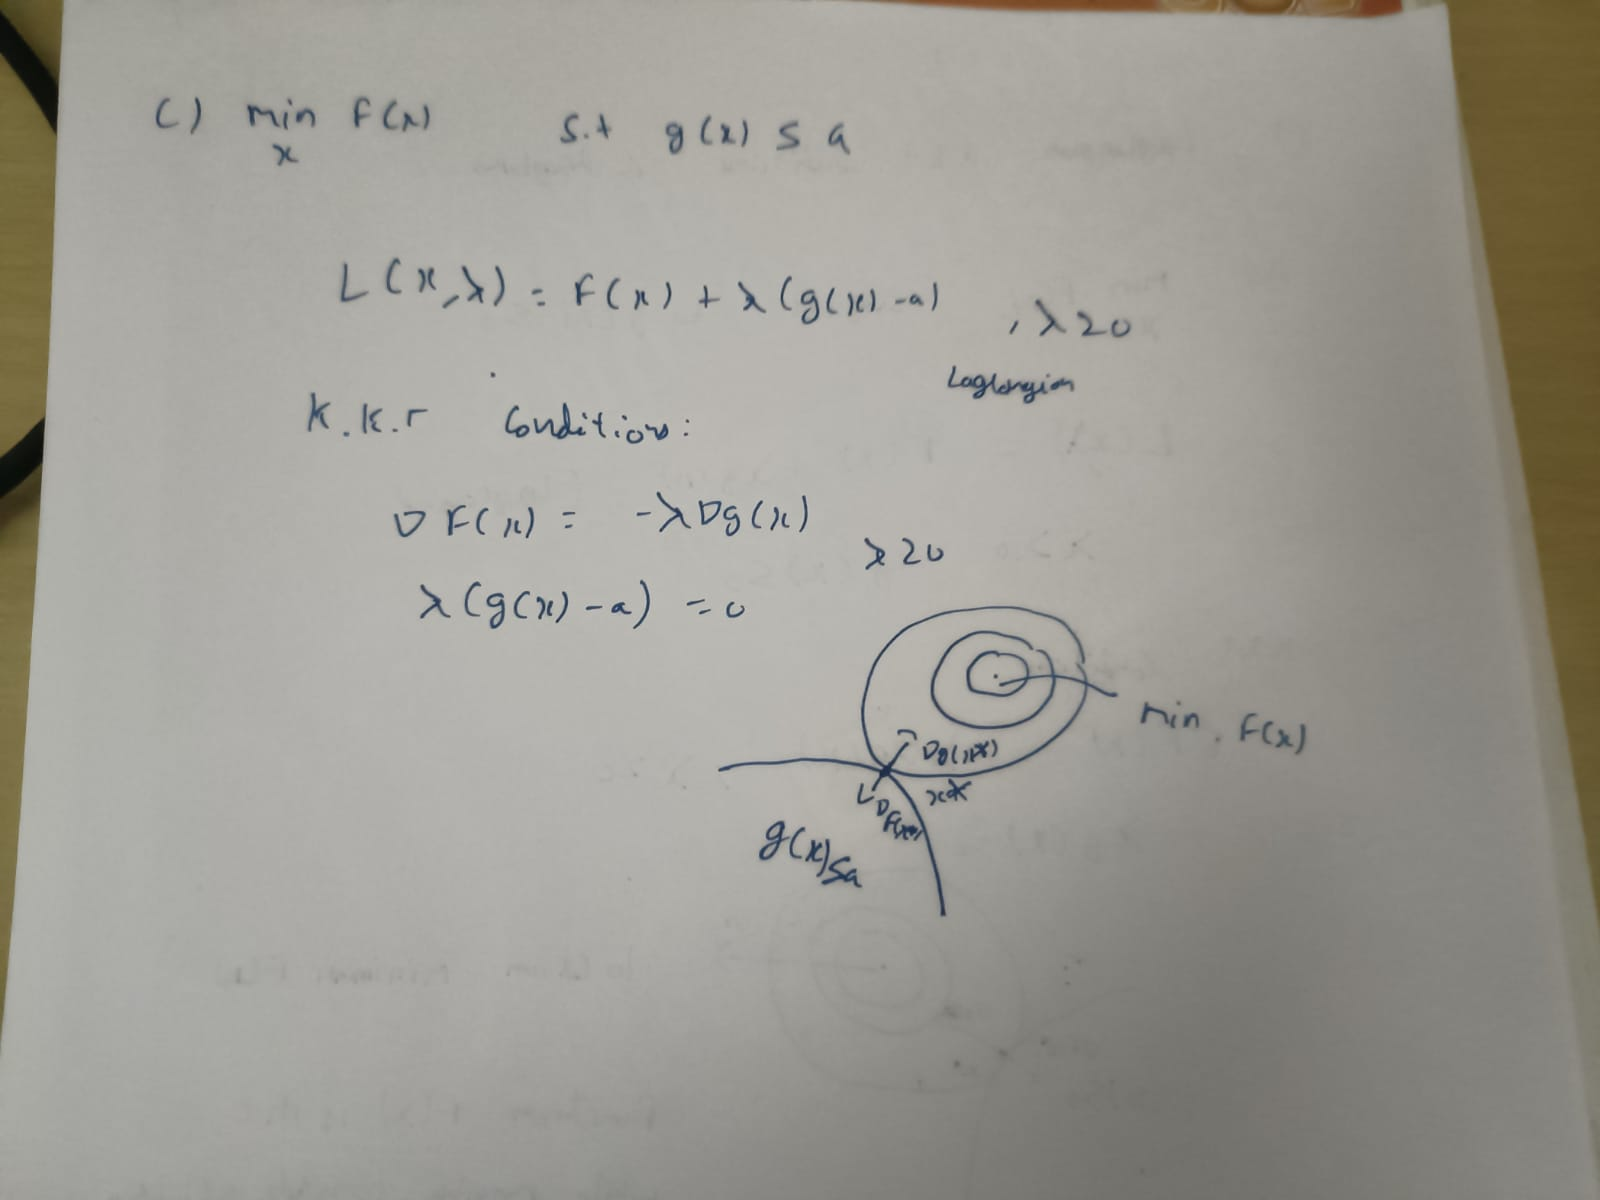


# 2) Hard Margin

### a) Lagrangian Formation

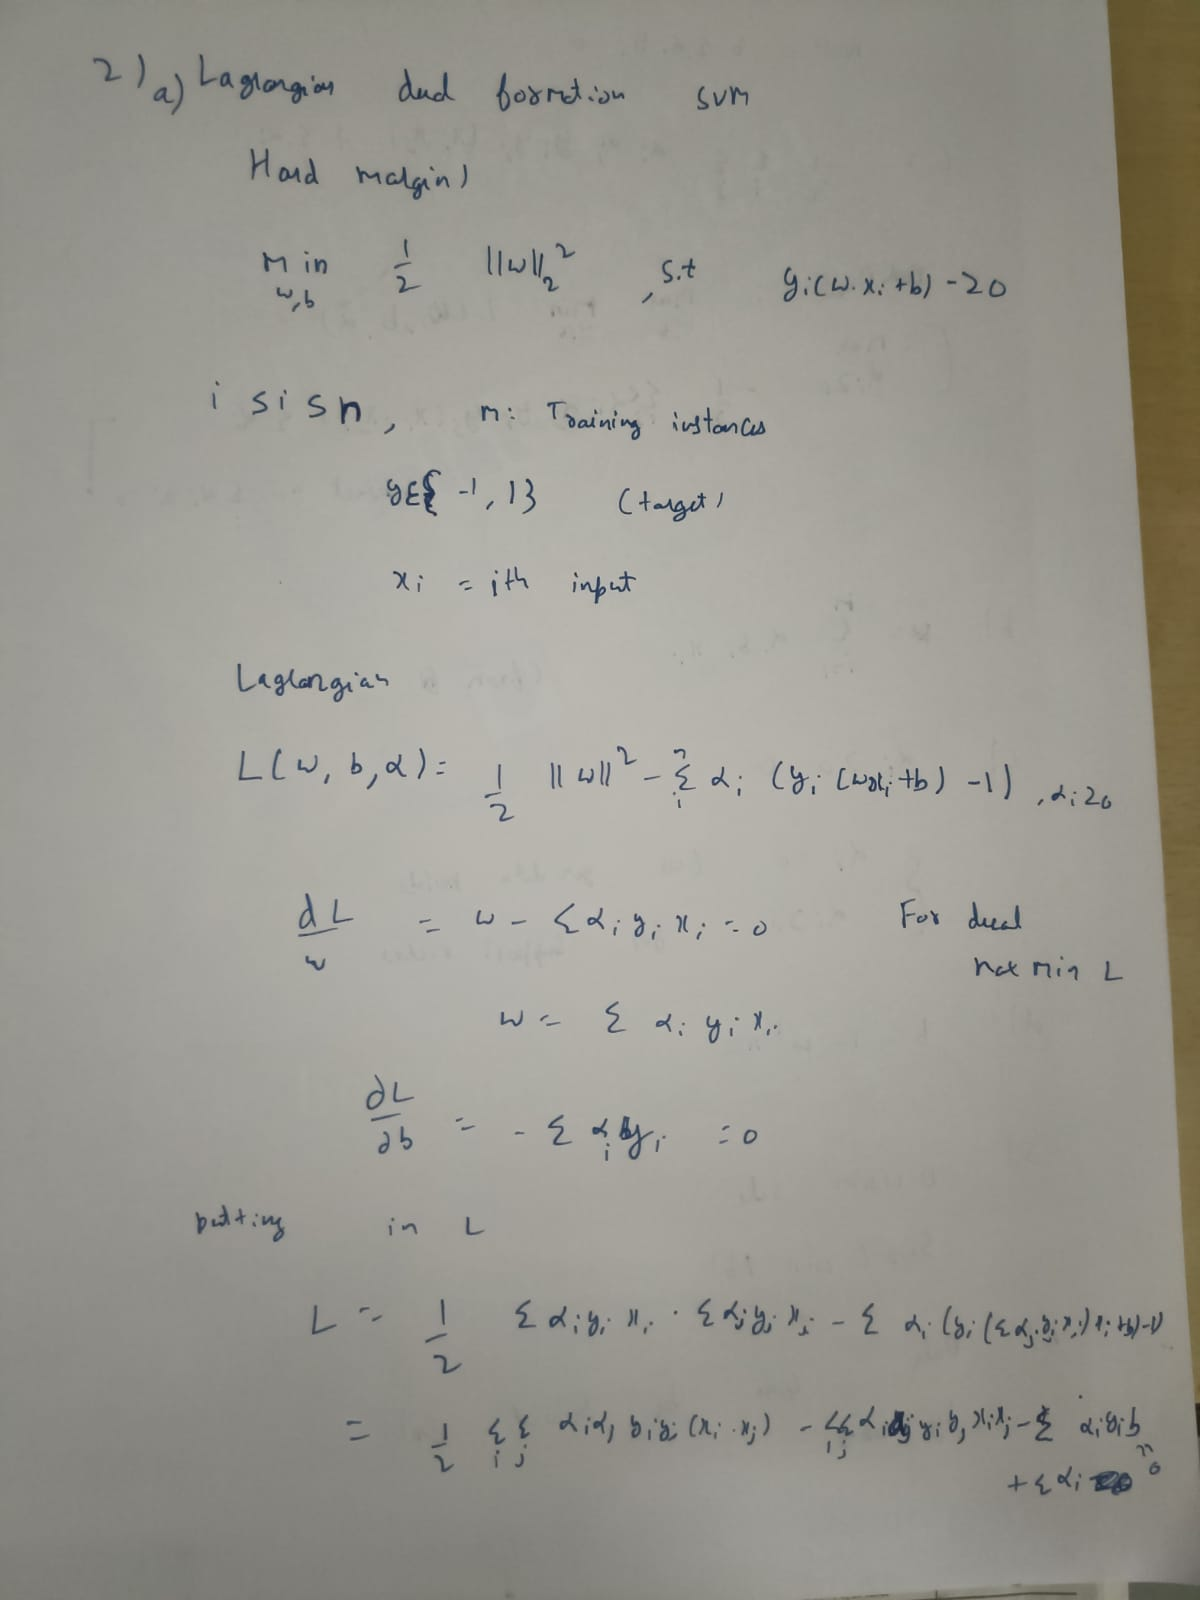

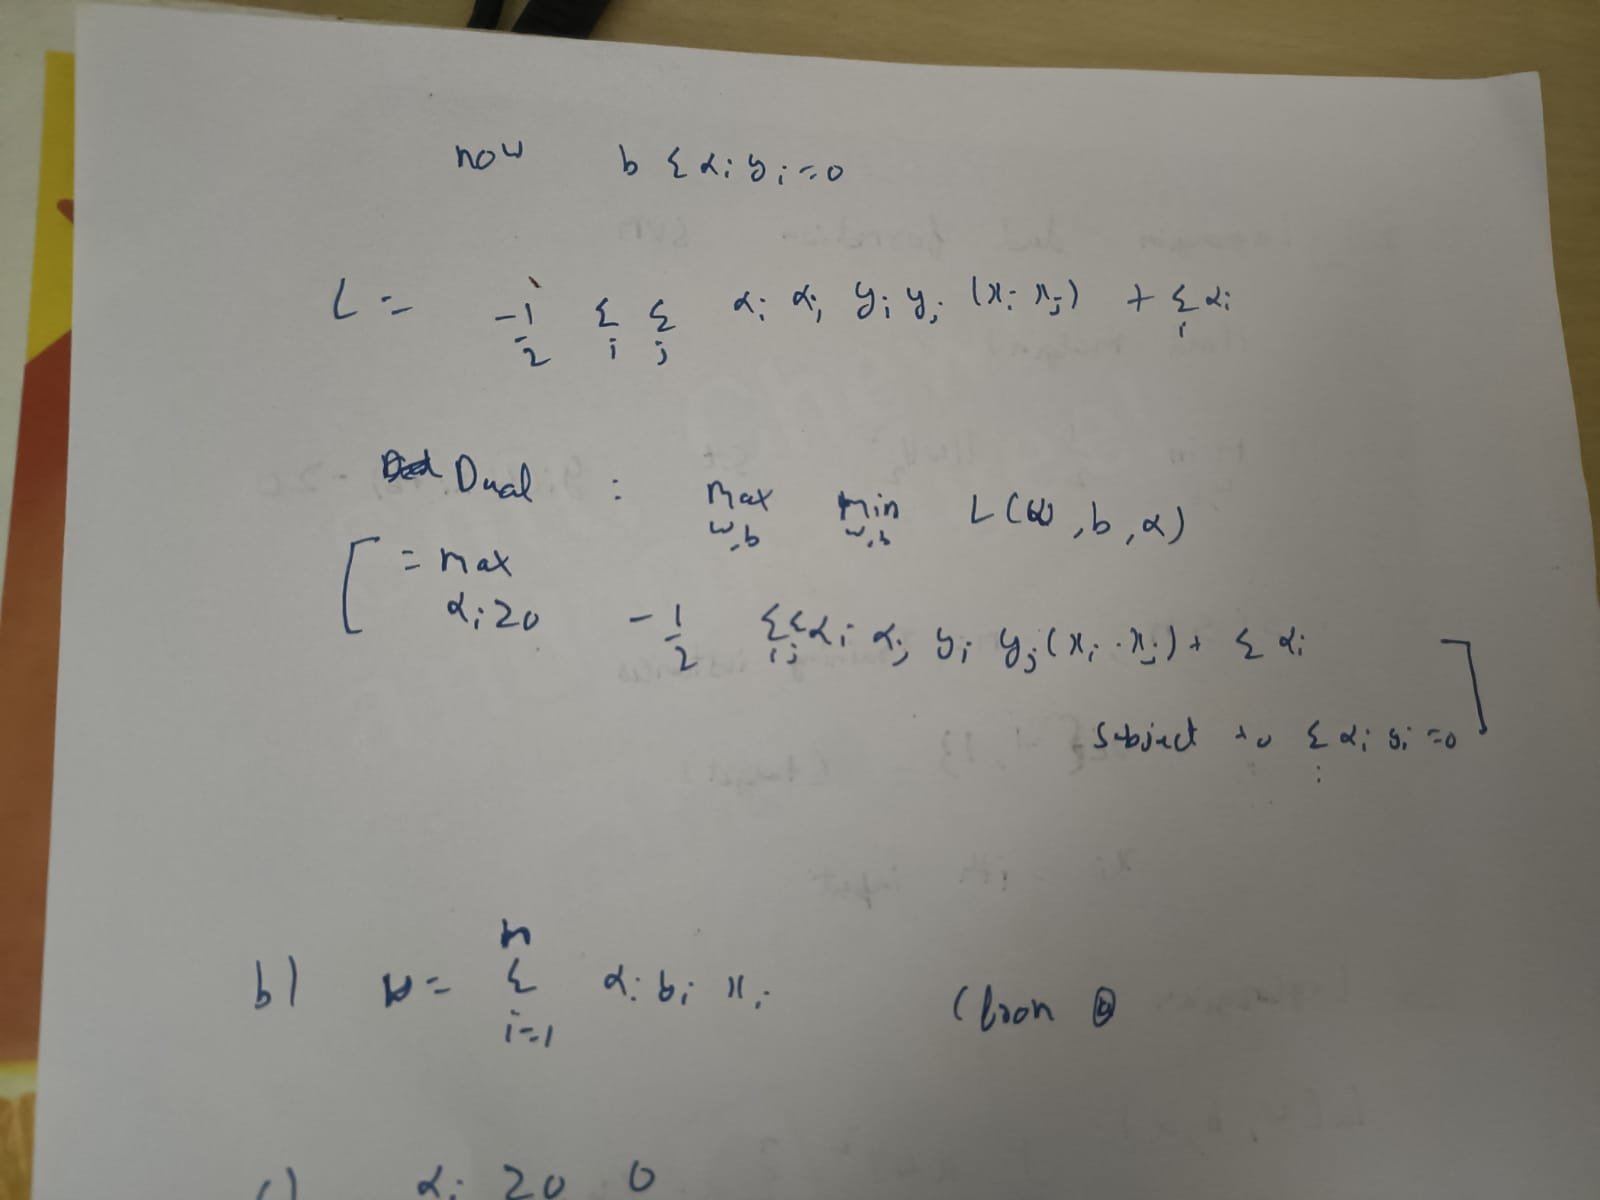

### b) Multipliers   
$\omega=\sum_{i=1}^n \alpha_iy_ix_i$  
From a) using $dL/dw=0$   


### c) $\alpha$ values  
$\alpha_i>=0$  
$\alpha_i>0$ for support vectors       
$\alpha_i=0$ for other points



### d) b?  
$b= 1 -w^Tx$

### e) Decision Rule:  
We check the sign of the distance of the point from the line.  
$sign(wx_{test}+b)$  
If it is positive then positive class otherwise negative. 0 means on the boundary

### f) Implementation

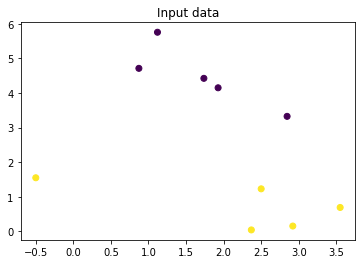

In [2]:
# making random 2d data
data, y = make_blobs(n_samples=10, centers=2, n_features=2,random_state=0)
m,n = data.shape
num_instance = 5
labels = np.where(y==0,-1,1)
plt.scatter(data[:,0],data[:,1],c=labels)
plt.title("Input data");

In [3]:
# Setting up the optimization problem
weight = cp.Variable(n)
bias = cp.Variable()
obj = cp.Minimize((cp.norm(weight,2)))  # primal for hard margin 
constraints = [labels[i]*(weight.T @ data[i] + bias) >= 1  for i in range(m)] # constraints

# constraints = [labels@(data@weight + bias) >= 1]  This is not working properly for some reason, had to replace this everywhere

prob = cp.Problem(obj, constraints)  # the problem


In [4]:
prob.solve()
print("Problem Status: %s"%prob.status)

Problem Status: optimal


In [5]:
w = weight.value
b = bias.value
print("Weights: ",w)
print("Bias: ",b)

Weights:  [-0.1529085  -0.92941933]
Bias:  2.5265676633578273


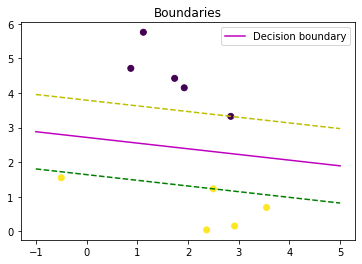

In [6]:
# Plotting the solution
x = np.linspace(-1, 5, 20)
plt.scatter(data[:,0],data[:,1],c=labels)

if (abs(w[1])<=1e-12):
    y = x.T
    x1 = (-b/w[0]) * np.ones((len(x),1));
    plt.plot(x1,y, 'm')
    plt.plot(-(b+1)/w[0]*np.ones(len(x)),y ,'g--')
    plt.plot(-(b-1)/w[0]*np.ones(len(x)),y, 'y--')
elif (abs(w[0])<=1e-12):
    x1=x.T
    y = (-b/w[1]) * np.ones((len(x),1));
    plt.plot(x1,y, 'm')
    plt.plot(-(b+1)/w[1]*np.ones(len(x)),y ,'g--')
    plt.plot(-(b-1)/w[1]*np.ones(len(x)),y, 'y--')
else:
    plt.plot(x, (-b - (w[0]*x))/w[1] , 'm')
    plt.plot(x, (-b - (w[0]*x)+1)/w[1] ,'g--')
    plt.plot(x, (-b - (w[0]*x)-1)/w[1] , 'y--')
plt.legend(['Decision boundary'])
plt.title("Boundaries")

plt.show();

In [7]:
# Accuracy
z = np.ndarray.flatten(np.sign(data@w+b)) 
acc = (np.average(labels==z))*100;
print("Train Accuarcy is : ",acc)


Train Accuarcy is :  100.0


### g)  cancelled

### h) Dual preferred?   
Some quadratic programming algorithms can solve the dual optimization faster than the primal. This can be seen better in high dimensions d>>n.  
Here no. of primal variables - d+1.  
No. of dual variables - n.

# 3) Soft Margin

a) Formation

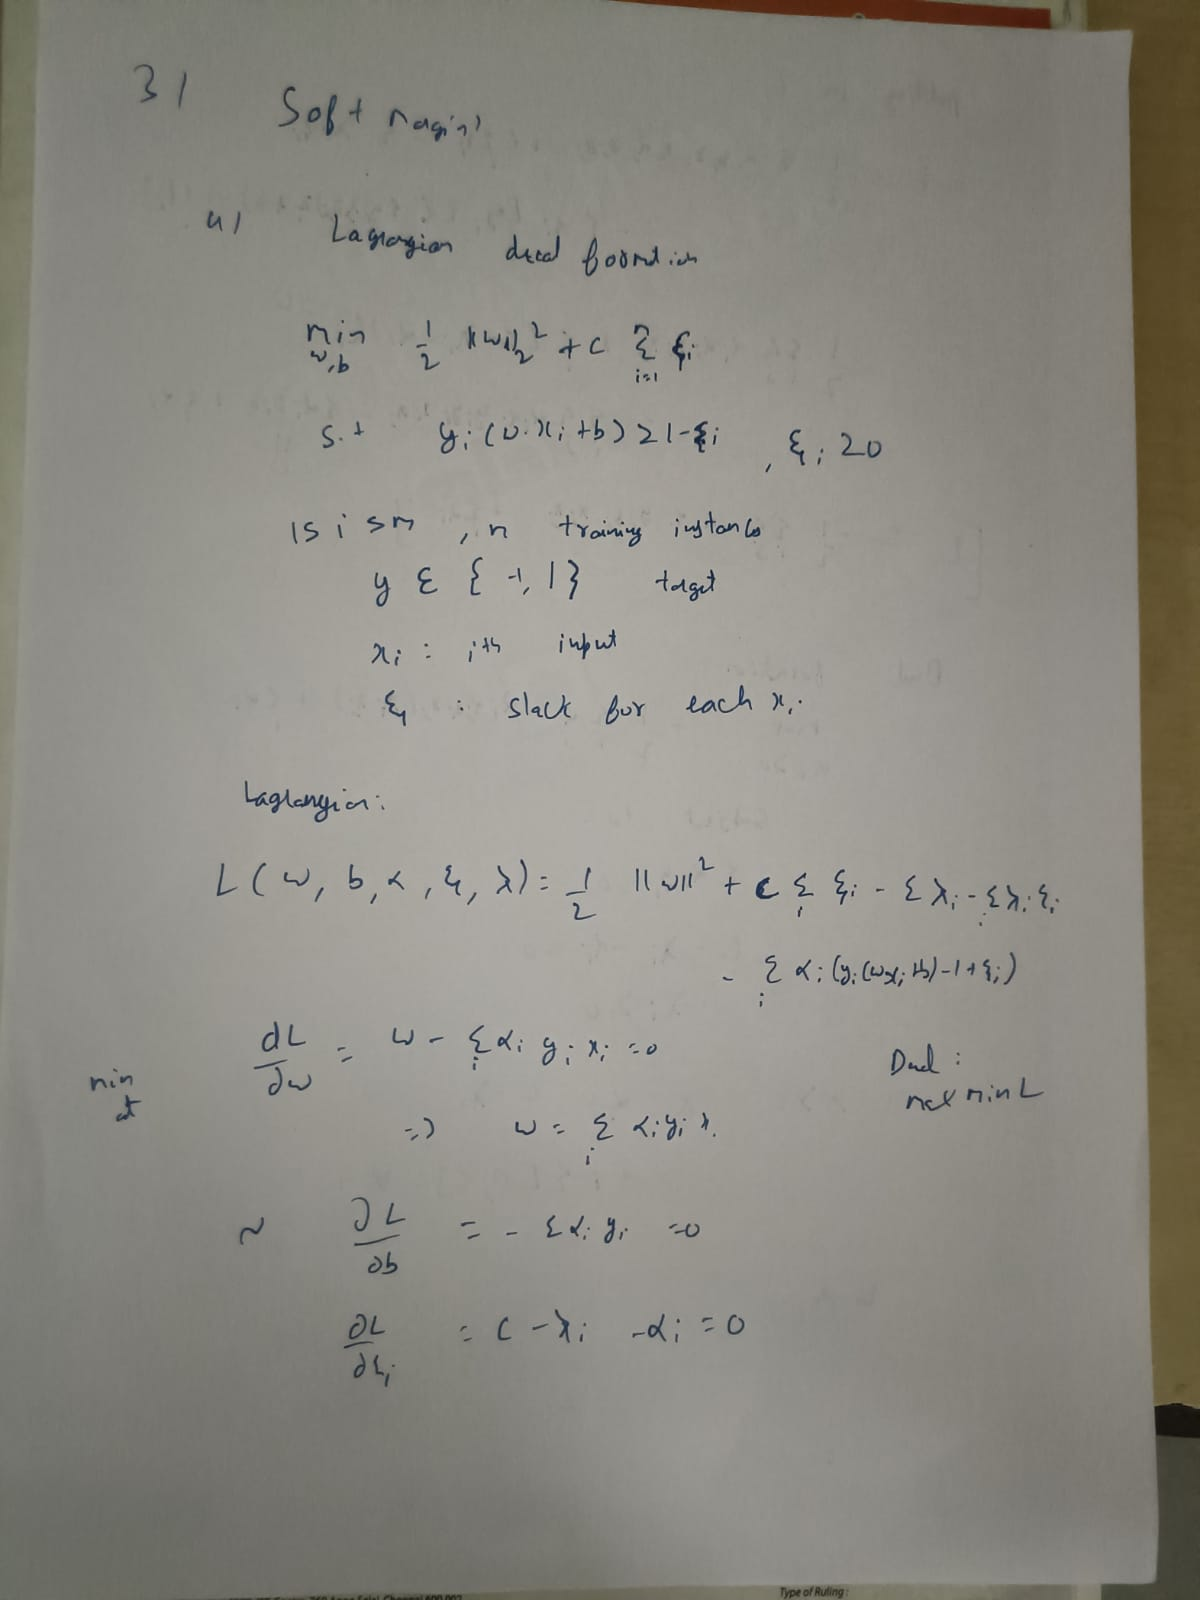

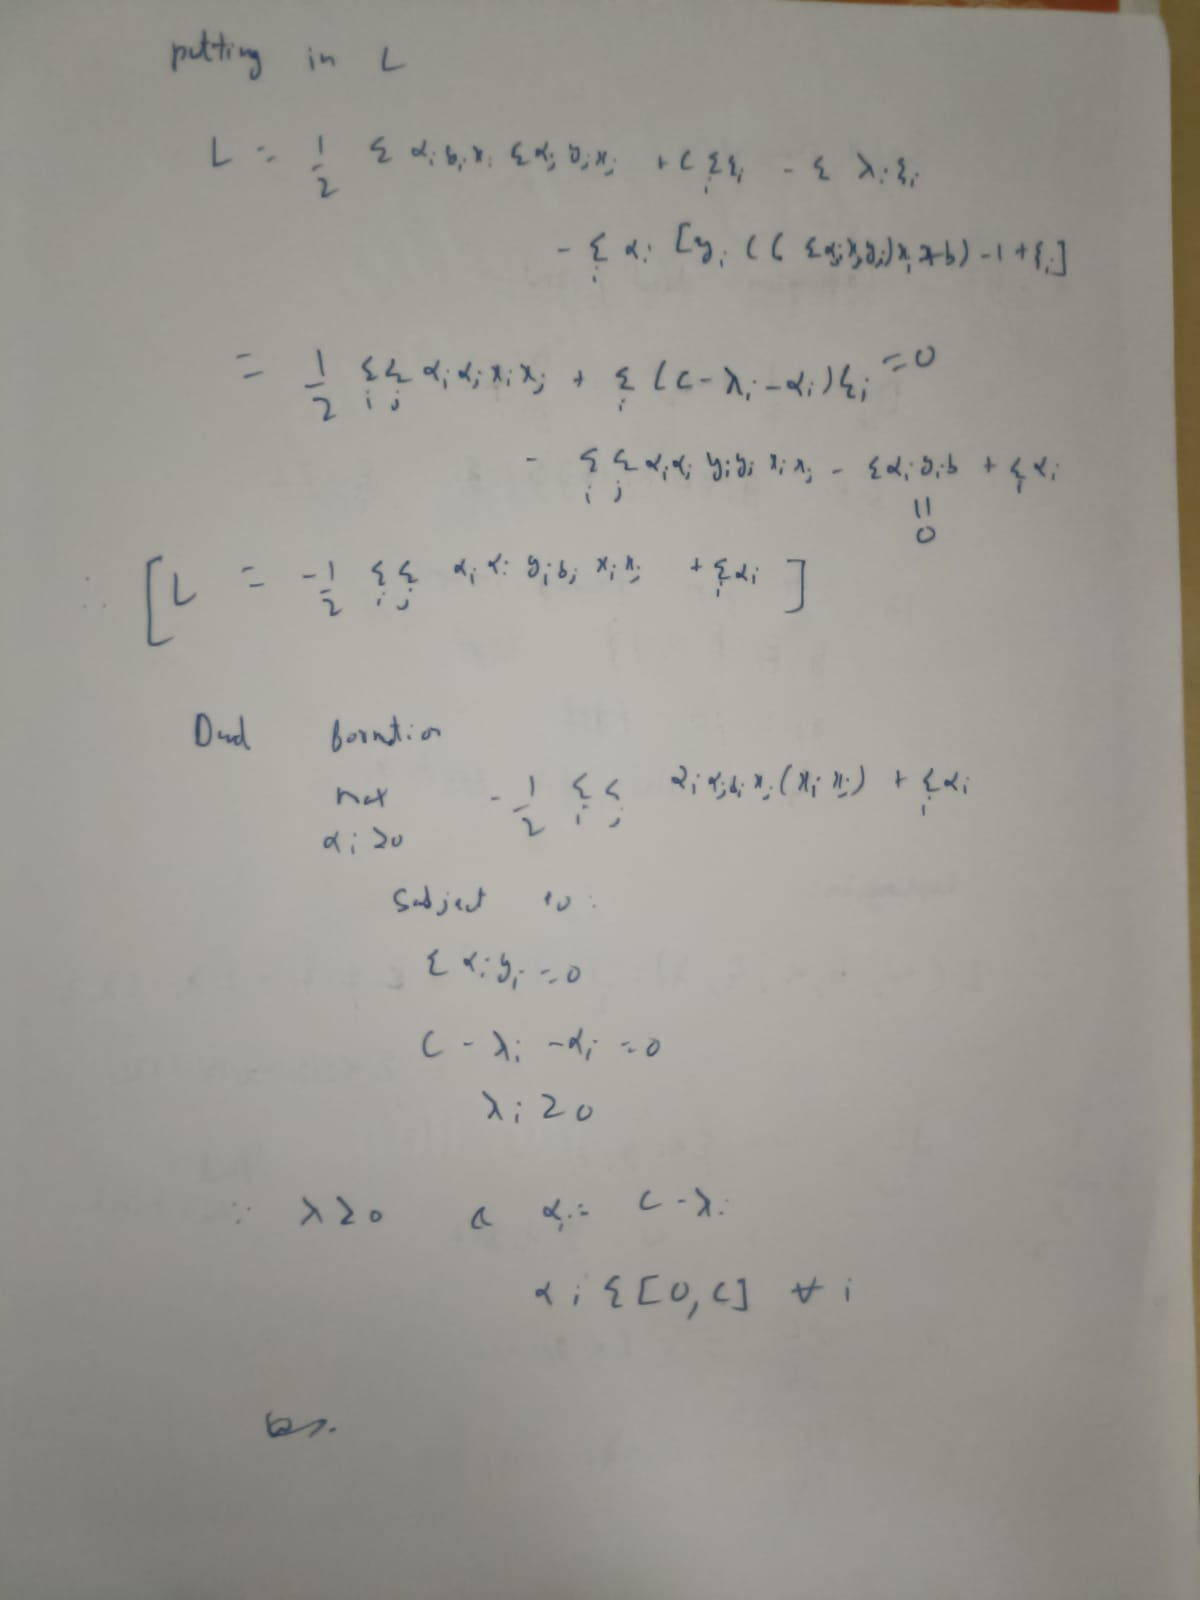

### b)  multipliers ($\alpha_i$)  
$\omega=\sum_{i=1}^m \alpha_iy_ix_i$  
From a) using $dL/dw=0$   

### c) Implementation

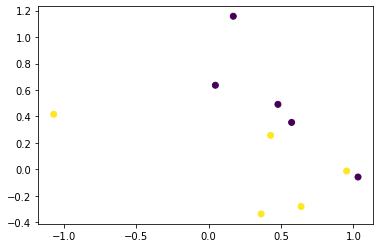

In [8]:
# data
data, y = make_blobs(n_samples=10, centers=2, n_features=2,center_box=(-1,1),cluster_std=0.5,random_state=0)
m,n = data.shape
num_instance = 5
labels = np.where(y==0,-1,1)
x = data[labels==1]
y = data[labels==-1]
plt.scatter(data[:,0],data[:,1],c=labels);

In [9]:
# Hyperparameter
C = 1

In [10]:
# the problem
weight = cp.Variable(n)
bias = cp.Variable(1)
psi = cp.Variable(m) # slack variable

obj = cp.Minimize(0.5*cp.square(cp.norm(weight)) + C*cp.sum(psi))   # soft margin optimization

x_const = [weight.T @ x[i] + bias + psi[i] >= 1  for i in range(5)]
y_const = [weight.T@ y[i] + bias + psi[i] <= -1 for i in range(5)]
psi_const = [psi[i]>=0 for i in range(10)]


constraints = x_const +  y_const + psi_const

prob = cp.Problem(obj, constraints)



In [11]:
prob.solve()
print("Problem Status: %s"%prob.status)

Problem Status: optimal


In [12]:
w = weight.value
b = bias.value
print("Weights: ",w)
print("Bias: ",b)

Weights:  [ -6.7807674  -10.35046493]
Bias:  [5.39070378]


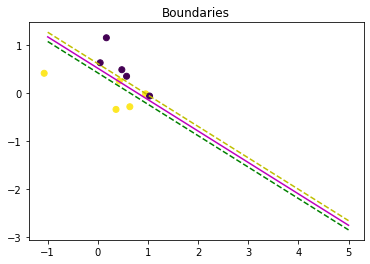

In [13]:
# Plotting

x = np.linspace(-1, 5, 20)
plt.scatter(data[:,0],data[:,1],c=labels)

if (np.abs(w[1])<=1e-12):
    y = x.T
    x1 = (-b/w[0]) * np.ones((len(x),1));
    plt.plot(x1,y, 'm',label="Decision Boundry")
    plt.plot(-(b+1)/w[0]*np.ones(len(x)),y ,'g--')
    plt.plot(-(b-1)/w[0]*np.ones(len(x)),y, 'y--')
elif (np.abs(w[0])<=1e-12):
    x1=x.T
    y = (-b/w[1]) * np.ones((len(x),1));
    plt.plot(x1,y, 'm',label="Decision Boundry")
    plt.plot(-(b+1)/w[1]*np.ones(len(x)),y ,'g--')
    plt.plot(-(b-1)/w[1]*np.ones(len(x)),y, 'y--')
else:
    plt.plot(x, (-b - (w[0]*x))/w[1] , 'm',label="Decision Boundry")
    plt.plot(x, (-b - (w[0]*x)+1)/w[1] ,'g--')
    plt.plot(x, (-b - (w[0]*x)-1)/w[1] , 'y--')
plt.title("Boundaries")

plt.show()

In [14]:
# Accuracy
z = np.ndarray.flatten(np.sign(data@w+b)) 
acc = (np.average(labels==z))*100;
print("Train Accuarcy is : ",acc)


Train Accuarcy is :  80.0


### d) cancelled

### e) Synthetic dataset for which $ξi=0$  



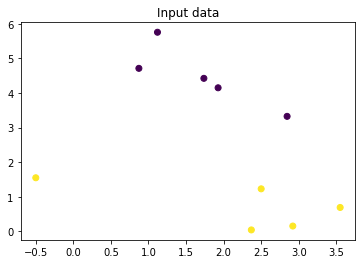

In [15]:
# making random 2d data
data, y = make_blobs(n_samples=10, centers=2, n_features=2,random_state=0)
m,n = data.shape
num_instance = 5
labels = np.where(y==0,-1,1)
x = data[labels==1]
y = data[labels==-1]
plt.scatter(data[:,0],data[:,1],c=labels)
plt.title("Input data");


In [16]:
# the problem
weight = cp.Variable(n)
bias = cp.Variable(1)
psi = cp.Variable(m) # slack variable
C = 0.1
obj = cp.Minimize(0.5*cp.square(cp.norm(weight)) + C*cp.sum(psi))   # soft margin optimization

x_const = [weight.T @ x[i] + bias + psi[i] >= 1  for i in range(5)]
y_const = [weight.T@ y[i] + bias + psi[i] <= -1 for i in range(5)]
psi_const = [psi[i]>=0 for i in range(10)]


constraints = x_const +  y_const + psi_const


prob = cp.Problem(obj, constraints)


prob.solve()
print("Problem Status: %s"%prob.status)

w = weight.value
b = bias.value

Problem Status: optimal


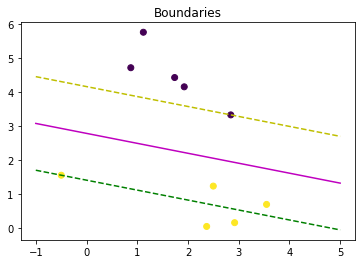

In [17]:
# Plotting

x = np.linspace(-1, 5, 20)
plt.scatter(data[:,0],data[:,1],c=labels)

if (np.abs(w[1])<=1e-12):
    y = x.T
    x1 = (-b/w[0]) * np.ones((len(x),1));
    plt.plot(x1,y, 'm',label="Decision Boundry")
    plt.plot(-(b+1)/w[0]*np.ones(len(x)),y ,'g--')
    plt.plot(-(b-1)/w[0]*np.ones(len(x)),y, 'y--')
elif (np.abs(w[0])<=1e-12):
    x1=x.T
    y = (-b/w[1]) * np.ones((len(x),1));
    plt.plot(x1,y, 'm',label="Decision Boundry")
    plt.plot(-(b+1)/w[1]*np.ones(len(x)),y ,'g--')
    plt.plot(-(b-1)/w[1]*np.ones(len(x)),y, 'y--')
else:
    plt.plot(x, (-b - (w[0]*x))/w[1] , 'm',label="Decision Boundry")
    plt.plot(x, (-b - (w[0]*x)+1)/w[1] ,'g--')
    plt.plot(x, (-b - (w[0]*x)-1)/w[1] , 'y--')
plt.title("Boundaries")

plt.show()

In [18]:
e = psi.value
e

array([ 4.07452932e-10,  4.04837413e-01,  2.36758400e-01, -2.43664037e-12,
        5.57322878e-11,  5.57743049e-11,  5.57743049e-11,  5.57743049e-11,
        5.57743049e-11,  5.57743049e-11])

we can see the values are roughly 0.
We can get this for data which is completely linearly seperable.

### f) C vs classification

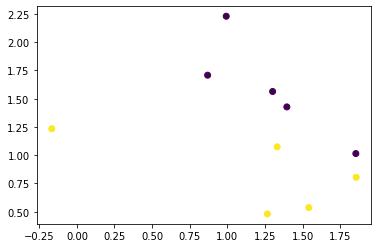

In [19]:
data, y = make_blobs(n_samples=10, centers=2, n_features=2,center_box=(-1,2.5),cluster_std=0.5,random_state=0)
m,n = data.shape
num_instance = 5
labels = np.where(y==0,-1,1)
x = data[labels==1]
y = data[labels==-1]



plt.scatter(data[:,0],data[:,1],c=labels);

In [20]:
W = []
B = []
for C in [0.1, 1 ,10, 100]:

    # the problem
    weight = cp.Variable(n)
    bias = cp.Variable(1)
    psi = cp.Variable(m) # slack variable


    x_constraints = [weight.T @ x[i] + bias + psi[i] >= 1  for i in range(5)]
    y_constraints = [weight.T@ y[i] + bias + psi[i] <= -1 for i in range(5)]
    Psi_constraint = [psi[i]>=0 for i in range(10)]

    obj = cp.Minimize(0.5*cp.square(cp.norm(weight)) + C*cp.sum(psi))   # soft margin optimization

    constraints = x_constraints +  y_constraints + Psi_constraint  
    prob = cp.Problem(obj, constraints)
    prob.solve()

    W.append(weight.value)
    B.append(bias.value)
    


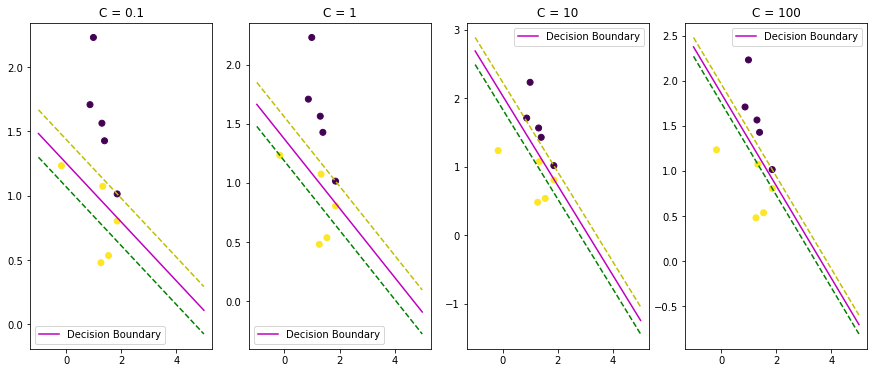

In [21]:
# Plotting
C = [0.1,1,10,100]
x1 = np.linspace(-1, 5, 20)
fig, ax = plt.subplots(1,4,figsize=(15, 6))
for i in range(4):
    w = W[i]
    b =  B[i]
    ax[i].scatter(data[:,0],data[:,1],c=labels)

    ax[i].plot(x1, (-b - (w[0]*x1))/w[1] , 'm')
    ax[i].plot(x1, (-b - (w[0]*x1)+1)/w[1] ,'g--')
    ax[i].plot(x1, (-b - (w[0]*x1)-1)/w[1] , 'y--')
    ax[i].legend(['Decision Boundary'])
    ax[i].set_title("C = "+str(C[i]))

plt.show()

In [22]:
# accuracy
for i in range(4):
    w = W[i]
    b =  B[i]
    z = np.ndarray.flatten(np.sign(data@w+b)) 
    acc = (np.average(labels==z))*100;
    print("For C = "+str(C[i])+" ,Train Accuarcy is : ",acc)


For C = 0.1 ,Train Accuarcy is :  90.0
For C = 1 ,Train Accuarcy is :  90.0
For C = 10 ,Train Accuarcy is :  100.0
For C = 100 ,Train Accuarcy is :  100.0


The hyperparameter C controls the amount of misclassifctaion allowed. So for large values of C it will choose to fit the data rather than maximize the boundary. As we can see above the classification is perfect but the margin is very small.

# 4)



### a)  
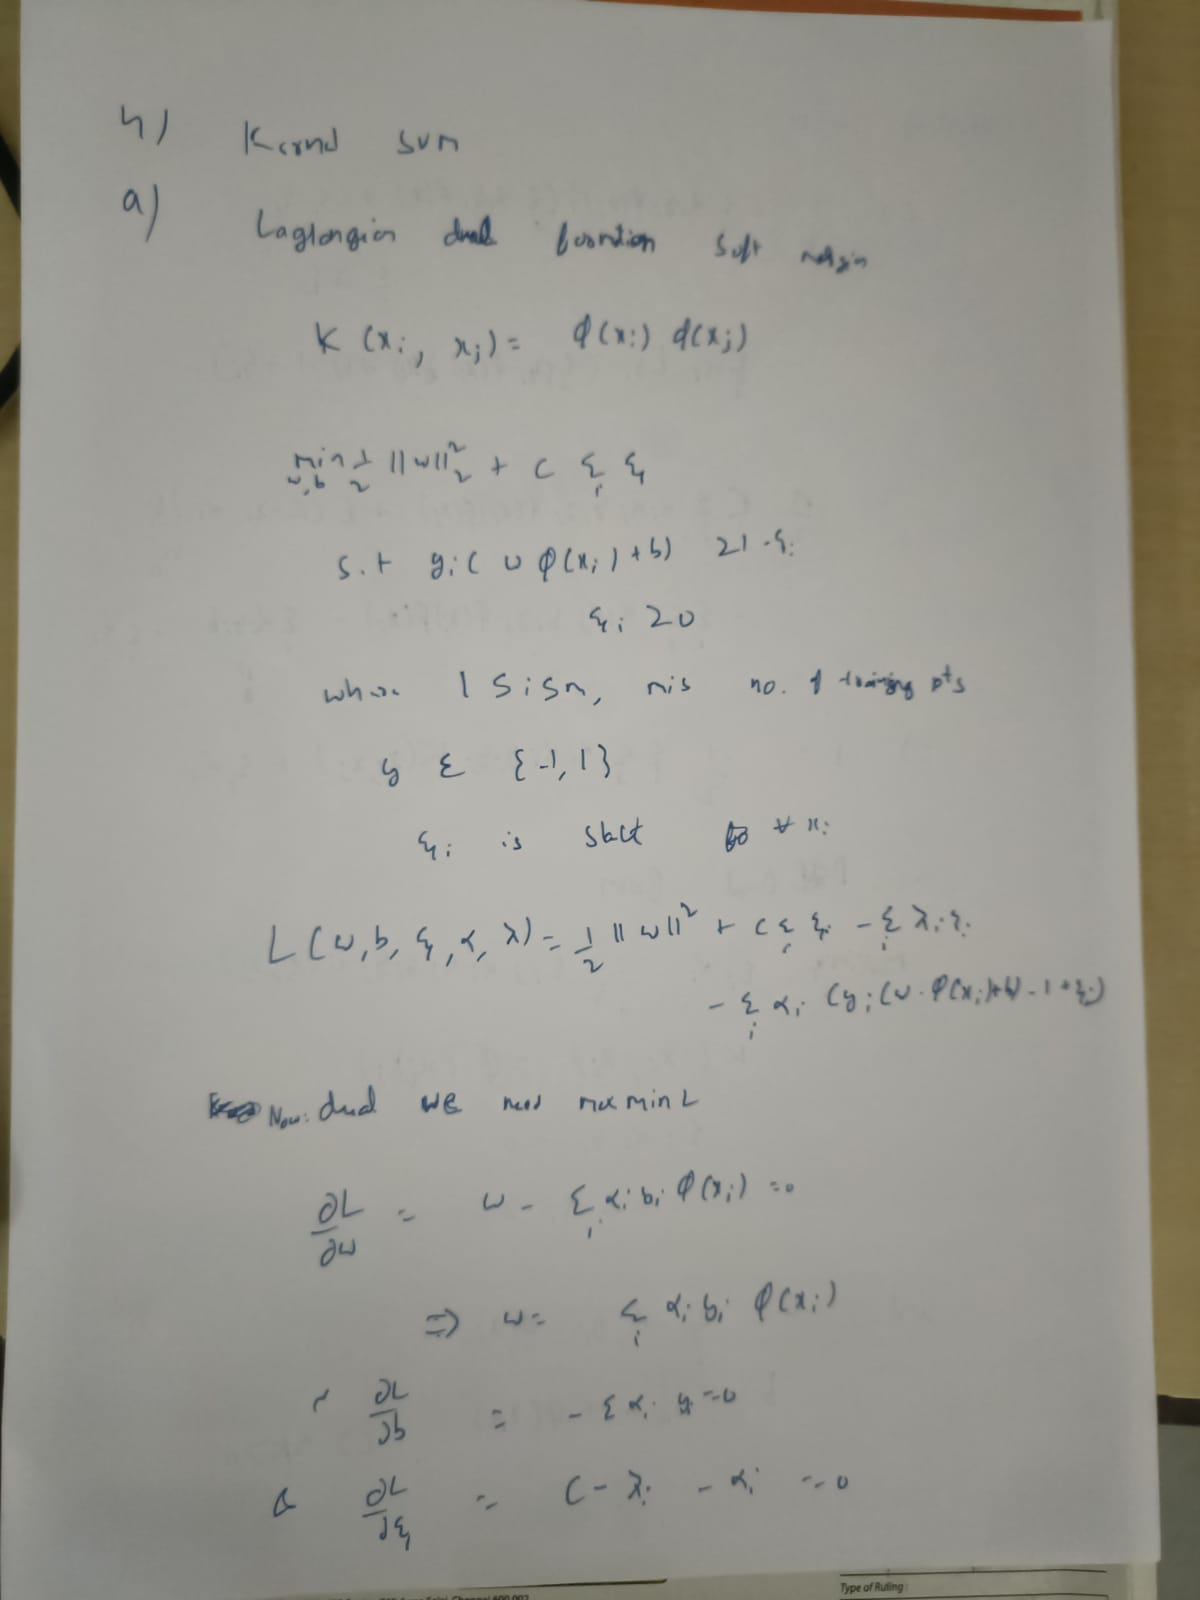

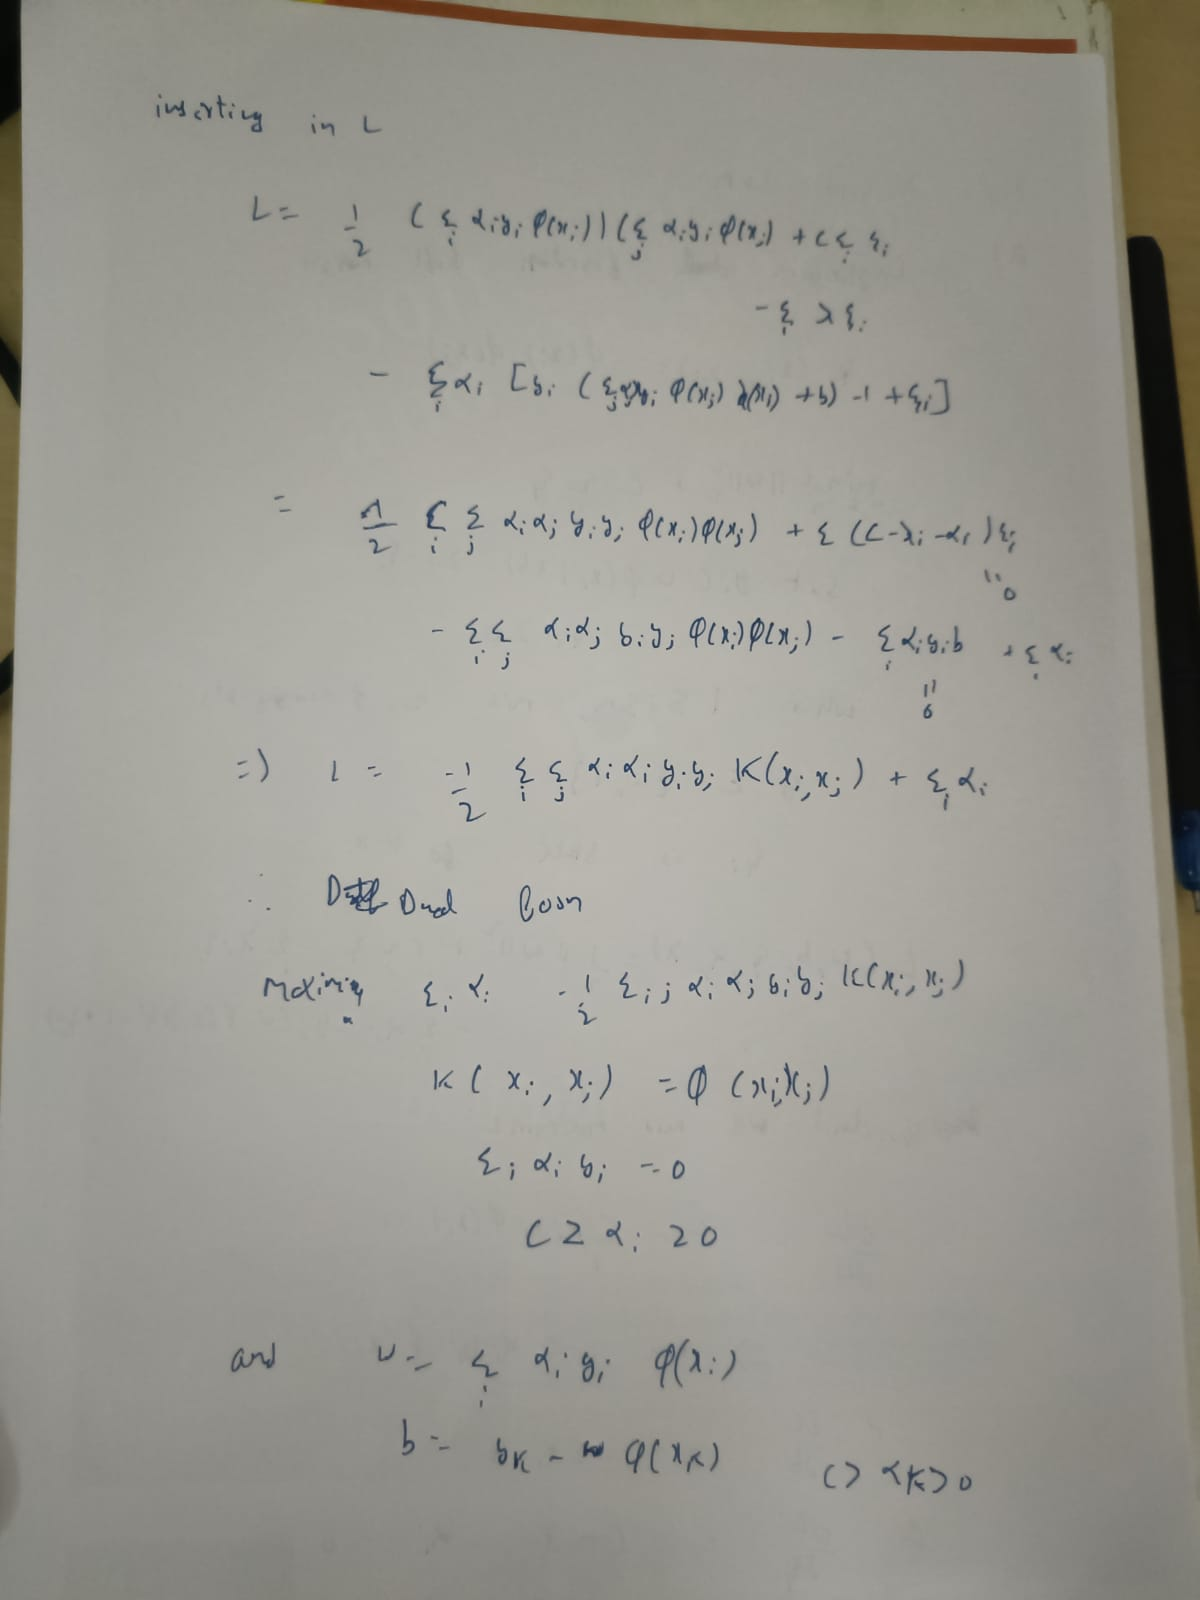

### b) Most common Kernels  
- Radial Basis Function (RBF)
- Polynomial Kernel
- Sigmoid Kernel
- Gaussion Kernel
- Linear Kernel

### c) Kernel Condition  
$K(xi, xj)=\phi(x_i)\phi(x_j)$

### d) b?  
$ b = y_k - w\phi(x_k)$  
For any k where $ C>\alpha_k>0$

### e) Classification  
We check :   
$ sign(w\phi(x_{test})+b)$



### f) Parameters and Hyperparameters
Parameters 
- W
- b
- ξ
- $\alpha$  
- Λ    
The only parameters we care are w and b, rest are slack variables.   
Hyperparameters
- Kernel
- C